In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from PIL import Image
import time

In [2]:
def get_data(file_name):
    with open(file_name) as f:
        data = json.load(f)
    img_names = [[dt['id'], dt['file_name']] for dt in data['images']]
    imgToAnns = {ann['image_id']: [] for ann in data['annotations']}    
    for ann in data['annotations']:
        ann['caption'] = pre_process_text(ann['caption'])        
        imgToAnns[ann['image_id']] += [ann]                
    return img_names, imgToAnns


def pre_process_text(text):
    forbiden_char = "?.;:!,$#%/'()[]0123456789=´+-&@`" + '"'
    text = text.lower()
    text = "".join(u for u in text if u not in forbiden_char)
    return text

In [26]:
with open("D_L_prediccion_h1_shf_100_pred_captions.json") as f:
    scores_1 = json.load(f)
with open("D_L_prediccion_h1_shf_50_pred_captions.json") as f:
    scores_2 = json.load(f)
with open("D_L_prediccion_h1_shf_25_pred_captions.json") as f:
    scores_3 = json.load(f)
with open("D_L_val_1_vs_rest_true_captions.json") as f:    
    scores_h1 = json.load(f)

In [27]:
def get_scores(scores):
    S = np.zeros((5000, 4))
    i = 0
    for s in zip(scores["dist_c1"],scores["dist_c2"],scores["dist_c3"],scores["dist_c4"]):    
        S[i] = np.array([scores["dist_c1"][s[0]],scores["dist_c2"][s[1]],scores["dist_c3"][s[2]],scores["dist_c4"][s[3]]])
        i += 1
    return S

In [28]:
scores_1 = get_scores(scores_1)
scores_2 = get_scores(scores_2)
scores_3 = get_scores(scores_3)
scores_h1 = get_scores(scores_h1)

In [33]:
scores_1 = np.max(scores_1, axis=1)
scores_2 = np.max(scores_2, axis=1)
scores_3 = np.max(scores_3, axis=1)
scores_h1 = np.max(scores_h1, axis=1)

In [34]:
print(np.mean(scores_1))
print(np.mean(scores_2))
print(np.mean(scores_3))
print(np.mean(scores_h1))

0.6800308745117399
0.6832912796925801
0.70230845614382
0.7252681475799599


In [52]:
def combine_scores(scores_list):
    n = len(scores_list[0])
    l = len(scores_list)
    skip = n // l
    scores = np.zeros_like(scores_list[0])
    order = np.zeros((n))
    for i in range(0, n, skip):
        if (i+skip>n):
            break
        scores[i: i + skip] = scores_list[i//skip][i: i + skip]
        order[i: i + skip] = i // skip
    return scores, order

def combine_scores_full(scores_list):
    n = len(scores_list[0])
    l = len(scores_list)
    scores = np.concatenate(scores_list)
    order = np.zeros_like(scores)    
    for i in range(l):        
        order[i*n: (i + 1)*n] = i 
    return scores, order

def plot(new_order, file_name, series_names):
    q0 = np.where(np.array(new_order)==0)
    q1 = np.where(np.array(new_order)==1)
    q2 = np.where(np.array(new_order)==2)
    q3 = np.where(np.array(new_order)==3)

    fig, ax = plt.subplots(figsize=(10,4))

    ax.hist(q0, 20, alpha=1, histtype="bar", linewidth=5, label=series_names[0], color='#440154')
    ax.hist(q1, 20, histtype="step", linewidth=2, label=series_names[1], color='#31688e')
    ax.hist(q2, 20, histtype="step", linewidth=2, label=series_names[2], color='#35b779')
    ax.hist(q3, 20, alpha=.9, histtype="bar", linewidth=5, label=series_names[3], color='#ded70b')
    ax.legend()
    plt.savefig('imgs/' + file_name, dpi=800)
    plt.show()

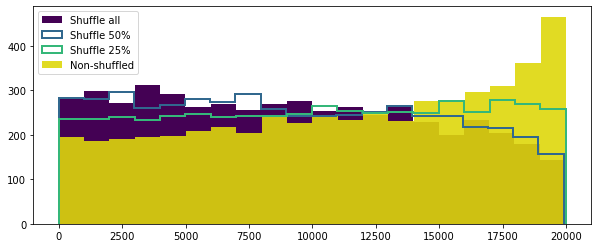

In [44]:
scores, order = combine_scores_full([scores_1,
                                     scores_2, 
                                     scores_3,
                                     scores_h1])
new_order = sorted(zip(scores, order))
new_order = [p[1] for p in new_order]
plot(new_order, "shf-D_L.pdf", ["Shuffle all", "Shuffle 50%", "Shuffle 25%", "Humans"])

In [40]:
stats.spearmanr(order, new_order)

SpearmanrResult(correlation=0.1362, pvalue=2.014194576755618e-83)

In [46]:
with open("D_L_prediccion_h1_rnd_pred_captions.json") as f:
    scores_1 = json.load(f)
with open("D_L_prediccion_h1_rnd_50_pred_captions.json") as f:
    scores_2 = json.load(f)
with open("D_L_prediccion_h1_rnd_25_pred_captions.json") as f:
    scores_3 = json.load(f)
with open("D_L_val_1_vs_rest_true_captions.json") as f:    
    scores_h1 = json.load(f)

In [47]:
scores_1 = get_scores(scores_1)
scores_2 = get_scores(scores_2)
scores_3 = get_scores(scores_3)
scores_h1 = get_scores(scores_h1)

In [48]:
scores_1 = np.max(scores_1, axis=1)
scores_2 = np.max(scores_2, axis=1)
scores_3 = np.max(scores_3, axis=1)
scores_h1 = np.max(scores_h1, axis=1)

In [49]:
print(np.mean(scores_1))
print(np.mean(scores_2))
print(np.mean(scores_3))
print(np.mean(scores_h1))

0.14606556553082
0.39612616840012
0.54839956009654
0.7252681475799599


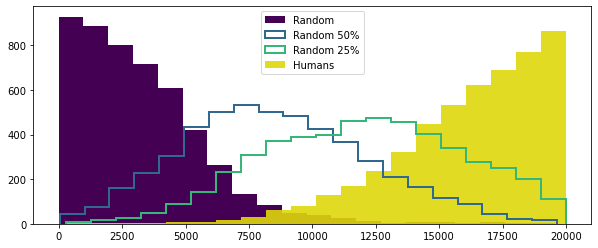

In [53]:
scores, order = combine_scores_full([scores_1,
                                     scores_2, 
                                     scores_3,
                                     scores_h1])
new_order = sorted(zip(scores, order))
new_order = [p[1] for p in new_order]
plot(new_order, "rnd-D_L.pdf", ["Random", "Random 50%", "Random 25%", "Humans"])

In [51]:
stats.spearmanr(order, new_order)

SpearmanrResult(correlation=0.79804, pvalue=0.0)